---
# **Mental Health in the Tech Industry**
---
## Explanation of the Data

[Coursera Course Dataset](https://www.kaggle.com/code/tasneemhesham/mental-health-in-tech-industries-analysis)

This data is from Open Source Mental Illness (OSMI) using survey data from years 2014, 2016, 2017, 2018 and 2019. Each survey measures and attitudes towards mental health and frequency of mental health disorders in the tech workplace.


## Key Point of the Project

Identify and analyze at least three mental health conditions within employees of tech companies.

## The SQLite database contains 3 tables: **Survey, Question, and Answer**

- **Survey**  

    *PRIMARY KEY INT* - SurveyID,  
    *TEXT* - Description  

- **Question**  

    *PRIMARY KEY* - QuestionID,  
    *TEXT* - QuestionText  

- **Answer**  

    *PRIMARY KEY* - UserID,  
    *FOREIGN KEY* - SurveyID,  
    *FOREIGN KEY* - QuestionID,  
    *TEXT* - AnswerText


## Content

1. [Data Overview](#data-overview)
2. [Questions](#questions)

    - [How many respondents data are available from 2014 to 2019?](#calculating-respondents-percentage-by-year)
    - [What is the distribution of respondents ages?](#what-is-the-distribution-of-respondents-ages)
    - [What is the gender distribution of respondents?](#what-is-the-gender-distribution-of-respondents)
    - [What is the career level distribution among respondents based on age?](#what-is-the-career-level-distribution-among-respondents-based-on-age)
    - [Which countries/continents do the respondents live in?](#which-countriescontinents-do-the-respondents-live-in)
    - [What are the most common mental health issues reported by respondents?](#what-are-the-most-common-mental-health-issues-reported-by-respondents)
    - [What are the most common mental health issues among respondents in tech companies?](#what-are-the-most-common-mental-health-issues-among-respondents-in-tech-companies)
    
3. [Final Remarks](#final-remarks)

---
## Libraries

The following libraries are imported for use in this project:
- `sqlite3` : to connect and interact with the SQLite database.
- `pandas` : for data manipulation and analysis.
- `numpy` : for numerical operations.
- `matplotlib.pyplot` : for visualizations.
- `seaborn` : for making statistical data visualizations.
- `Functions`: custom module containing additional functions for the analysis.

In [1]:
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Functions import *

db_path = "mental_health.sqlite"

## Data Overview

---

### Querying the `Answer` Table

This section demonstrates how to query the `Answer` table from the SQLite database and load the results into a DataFrame.


In [2]:
answers_table_query = """
SELECT *
FROM Answer
"""

answers_table = sql_connection(db_path, answers_table_query)
answers_table

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
...,...,...,...,...
236893,Other,2016,2689,117
236894,Support,2016,2690,117
236895,Back-End Developer,2016,2691,117
236896,Devops/Sysadmin,2016,2692,117


---

### Inspecting the `answers_table` DataFrame

To understand the structure of the `answers_table` DataFrame and check for data types, null values, and column information, the `.info()` method is used.

In [3]:
answers_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236898 entries, 0 to 236897
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   AnswerText  236898 non-null  object
 1   SurveyID    236898 non-null  int64 
 2   UserID      236898 non-null  int64 
 3   QuestionID  236898 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.2+ MB


Total Entries: **236 898 rows**.

- AnswerText (object): Contains textual responses with no missing values.
- SurveyID (int64): Identifies the survey for the answer with no missing values.
- UserID (int64): Identifies the user who provided the answer with no missing values.
- QuestionID (int64): Identifies the survey question corresponding to the answer with no missing values.

---
### Checking for Missing Values in `answers_table`

To identify missing values in the `answers_table` DataFrame, the `.isnull().sum()` method is used.

In [4]:
answers_table.isnull().sum()

AnswerText    0
SurveyID      0
UserID        0
QuestionID    0
dtype: int64

This indicates that there are no null or missing values in any of the columns.

---
### Counting Unique Values in `answers_table`

To determine the number of unique values in each column of the `answers_table` DataFrame, the `.nunique()` method is used.

In [5]:
answers_table.nunique()

AnswerText    4179
SurveyID         5
UserID        4218
QuestionID     105
dtype: int64

- **AnswerText**: 4179 unique answers.
- **SurveyID**: 5 unique surveys.
- **UserID**: 4218 unique users.
- **QuestionID**: 105 unique questions

---
### For DataFrame Overview: Sorting the `answers_table` by `AnswerText`

To sort the rows of the `answers_table` DataFrame by the values in the `AnswerText` column, the `.sort_values()` method is used.

In [6]:
answers_table.sort_values(by="AnswerText")

,AnswerText,SurveyID,UserID,QuestionID
229387,,2019,3969,87
170146,,2017,3211,87
229424,,2019,4006,87
229160,,2019,4094,86
229490,,2019,4072,87
...,...,...,...,...
192405,\-,2018,3525,63
115844,\-,2017,3341,2
169108,\- Decrease Overall Pressure And Workload For ...,2017,2929,86
169495,\- Too Much Focus On Individualism Which Leads...,2017,3316,86


There are a few rows with pincomplete answers, such as:

- Missing values ("").
- Special characters (e.g., "¯(°_O)/¯").
- Longer or more complex responses ("- Decrease Overall Pressure And Workload For...").

---
### Querying the `Question` Table

This section demonstrates how to query the `Question` table from the SQLite database and load the results into a Pandas DataFrame.

In [7]:
question_table_query = """
SELECT * 
FROM Question
"""

question_table = sql_connection(db_path, question_table_query)
question_table

,questiontext,questionid
0,What Is Your Age?,1
1,What Is Your Gender?,2
2,What Country Do You Live In?,3
3,"If You Live In The United States, Which State ...",4
4,Are You Self-Employed?,5
...,...,...
100,Do You Think That Team Members/Co-Workers Woul...,114
101,"If Yes, What Condition(S) Have You Been Diagno...",115
102,"If Maybe, What Condition(S) Do You Believe You...",116
103,Which Of The Following Best Describes Your Wor...,117


There are 105 rows in this dataset, representing 105 unique questions in the survey.

---
### Inspecting the `question_table` DataFrame

To understand the structure of the `question_table` DataFrame, including column names, data types, and the number of non-null entries, the `.info()` method is used.


In [8]:
question_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   questiontext  105 non-null    object
 1   questionid    105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


Total Entries: **105** rows (survey questions).

- questiontext (object): The text of the survey question with no missing values.
- questionid (int64): The unique identifier for each question with no missing values.

---
### Checking for Missing Values in `question_table`

To identify missing values in the `question_table` DataFrame, the `.isnull().sum()` method is used.

In [9]:
question_table.isnull().sum()

questiontext    0
questionid      0
dtype: int64

This indicates that there are no null or missing values in any of the columns.

---
### Counting Unique Values in `question_table`

To determine the number of unique values in each column of the `question_table` DataFrame, the `.nunique()` method is used.

In [10]:
question_table.nunique()

questiontext    105
questionid      105
dtype: int64

- **questiontext**: 105 unique questions.
- **questionid**: each question has unique id

---
### Querying the `Survey` Table

This section demonstrates how to query the `Survey` table from the SQLite database and display the first few rows of the result.

In [11]:
survey_table_query = """
SELECT * 
FROM Survey
"""

survey_table = sql_connection(db_path, survey_table_query)
survey_table.head()

,SurveyID,Description
0,2014,Mental Health Survey For 2014
1,2016,Mental Health Survey For 2016
2,2017,Mental Health Survey For 2017
3,2018,Mental Health Survey For 2018
4,2019,Mental Health Survey For 2019


---
### Inspecting the `survey_table` DataFrame

To understand the structure of the `survey_table` DataFrame, including column names, data types, and the number of non-null entries, the `.info()` method is used.

In [12]:
survey_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SurveyID     5 non-null      int64 
 1   Description  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


Total Entries: **5** rows

- SurveyID (int64): The unique identifier for each survey.
- Description (object): A textual description of the survey.

---
### Querying the `full_table` with Joins

This section demonstrates how to query a combined dataset from the `Answer`, `Question`, and `Survey` tables by using SQL joins and ordering the result.

In [13]:
full_table_query = """
SELECT 
    a.UserID AS user_id,
    a.SurveyID AS year,
    a.QuestionID AS question_id,
    o.QuestionText AS question,
    a.AnswerText AS answer_text
FROM Answer a
JOIN Question o ON a.QuestionID = o.QuestionID
JOIN Survey s ON a.SurveyID = s.SurveyID
ORDER BY 1;
"""

full_table = sql_connection(db_path, full_table_query)
full_table

,user_id,year,question_id,question,answer_text
0,1,2014,1,What Is Your Age?,37
1,1,2014,2,What Is Your Gender?,Female
2,1,2014,3,What Country Do You Live In?,United States
3,1,2014,4,"If You Live In The United States, Which State ...",Illinois
4,1,2014,5,Are You Self-Employed?,-1
...,...,...,...,...,...
236893,4218,2019,85,"Overall, How Well Do You Think The Tech Indust...",3
236894,4218,2019,86,Briefly Describe What You Think The Industry A...,Reduce Stigma. Offer Options For Part Time Wor...
236895,4218,2019,87,If There Is Anything Else You Would Like To Te...,I'Ve Had To Drive All Of The Progress In Menta...
236896,4218,2019,88,Would You Be Willing To Talk To One Of Us More...,1


---
### Inspecting the `full_table` DataFrame

To understand the structure of the `full_table` DataFrame, including column names, data types, and the number of non-null entries, the `.info()` method is used.

In [14]:
full_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236898 entries, 0 to 236897
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      236898 non-null  int64 
 1   year         236898 non-null  int64 
 2   question_id  236898 non-null  int64 
 3   question     236898 non-null  object
 4   answer_text  236898 non-null  object
dtypes: int64(3), object(2)
memory usage: 9.0+ MB


Total Entries: **236,898** rows

- user_id (int64): The unique identifier for each user.
- year (int64): The year when the survey was conducted.
- question_id (int64): The unique identifier for each survey question.
- question (object): The text of the survey question.
- answer_text (object): The text of the user"s answer.

---
### Counting Unique Values in `full_table`

To determine the number of unique values in each column of the `full_table` DataFrame, the `.nunique()` method is used.


In [15]:
full_table.nunique()

user_id        4218
year              5
question_id     105
question        105
answer_text    4179
dtype: int64

- There are 4218 unique users, with 4179 unique answers.
- There are multiple surveys conducted over 5 years.
- Set of 105 unique questions.

## Questions
---

### Calculating Respondents Percentage by Year

This section demonstrates how to `calculate` the percentage of `unique respondents` for each survey year using a `SQL query` and then visualizing the results.

**How many respondents data are available from 2014 to 2019?**


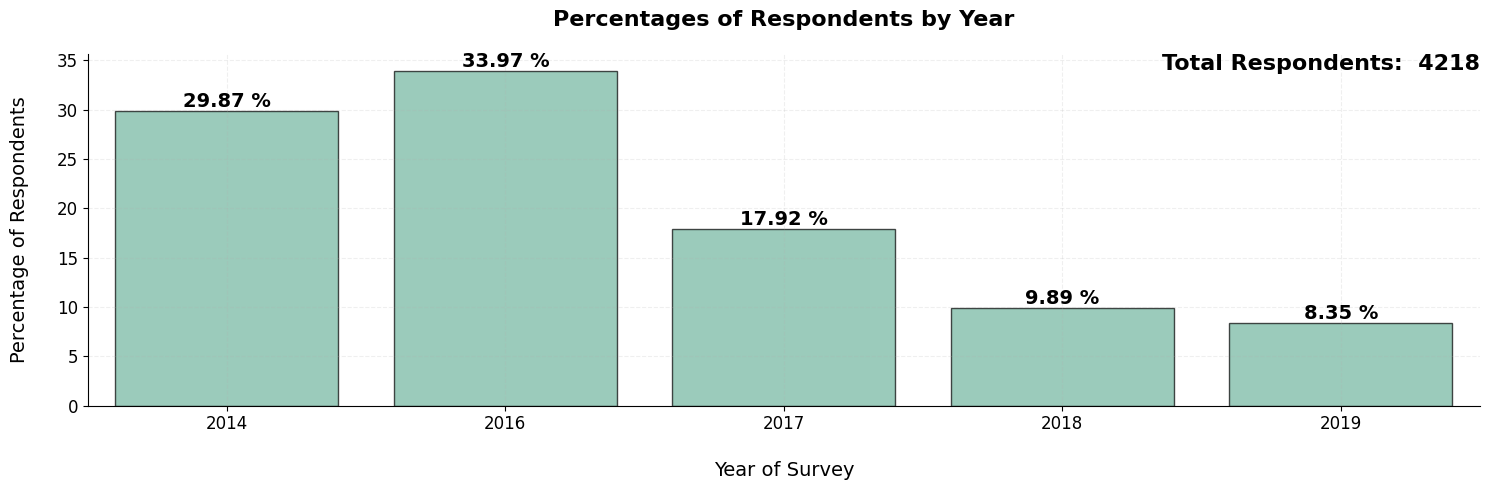

In [16]:
respondents_percentage_query = """
WITH unique_user_year AS (
    SELECT 
        SurveyID AS year,
        COUNT(DISTINCT UserID) AS unique_users
    FROM Answer
    GROUP BY 1
),
total_unique_user AS (
    SELECT 
        COUNT(DISTINCT UserID) AS total_unique_users
    FROM Answer
)
SELECT 
    u.year,
    u.unique_users,
    (u.unique_users * 100.0 / t.total_unique_users) AS percentage
FROM unique_user_year u
JOIN total_unique_user t
ORDER BY 1 DESC;
"""

respondents_percentage_year = sql_connection(db_path, respondents_percentage_query)
respondents_percentage(respondents_percentage_year, "year", "percentage", "unique_users")

2016 had the most responses, along with 2014. We can observe that there is no data for 2015, and the percentage of respondents has been decreasing each year since 2016, dropping from 33.97% in 2016 to 8.35% in 2019.

---
### Querying Unique Answers for Each Question

This section demonstrates how to query the `unique answers` provided for each question in the dataset and `count` how many times each answer appears.

In [17]:
unique_answers_query = """
SELECT 
    o.QuestionID AS question_id,
    o.questiontext AS question,
    a.AnswerText AS answer_text,
    COUNT(*) AS total
FROM Answer a
JOIN Question o ON a.QuestionID = o.QuestionID
GROUP BY 1
ORDER BY 1;
"""

unique_answers = sql_connection(db_path, unique_answers_query)
unique_answers

,question_id,question,answer_text,total
0,1,What Is Your Age?,37,4218
1,2,What Is Your Gender?,Female,4218
2,3,What Country Do You Live In?,United States,4218
3,4,"If You Live In The United States, Which State ...",Illinois,4218
4,5,Are You Self-Employed?,-1,4218
...,...,...,...,...
100,114,Do You Think That Team Members/Co-Workers Woul...,"No, I Don'T Think They Would",1433
101,115,"If Yes, What Condition(S) Have You Been Diagno...",-1,2072
102,116,"If Maybe, What Condition(S) Do You Believe You...",-1,1793
103,117,Which Of The Following Best Describes Your Wor...,Back-End Developer,2692


Unique answers dataset shows 105 distinct questions along with the total number of respondents who answered each question ranging from 1433 to 4218 respondents.

---
### Querying Respondents Gender

This section demonstrates `gender of respondents`.

**What is the gender distribution of respondents?**

In [18]:
respondents_gender_query = """
SELECT 
    o.QuestionText AS question,
    a.AnswerText AS gender
FROM Answer a
JOIN Question o ON a.QuestionID = o.QuestionID
WHERE a.QuestionID = 2
ORDER BY 2 DESC;
"""

respondents_gender = sql_connection(db_path, respondents_gender_query)
respondents_gender

,question,gender
0,What Is Your Gender?,Uhhhhhhhhh Fem Genderqueer?
1,What Is Your Gender?,Transgender
2,What Is Your Gender?,Trans Woman
3,What Is Your Gender?,Sometimes
4,What Is Your Gender?,Something Kinda Male?
...,...,...
4213,What Is Your Gender?,-1
4214,What Is Your Gender?,-1
4215,What Is Your Gender?,-1
4216,What Is Your Gender?,-1


Respondents gender data shows that there are more genders to consider in the dataset, along with responses from individuals who did not answer the question.

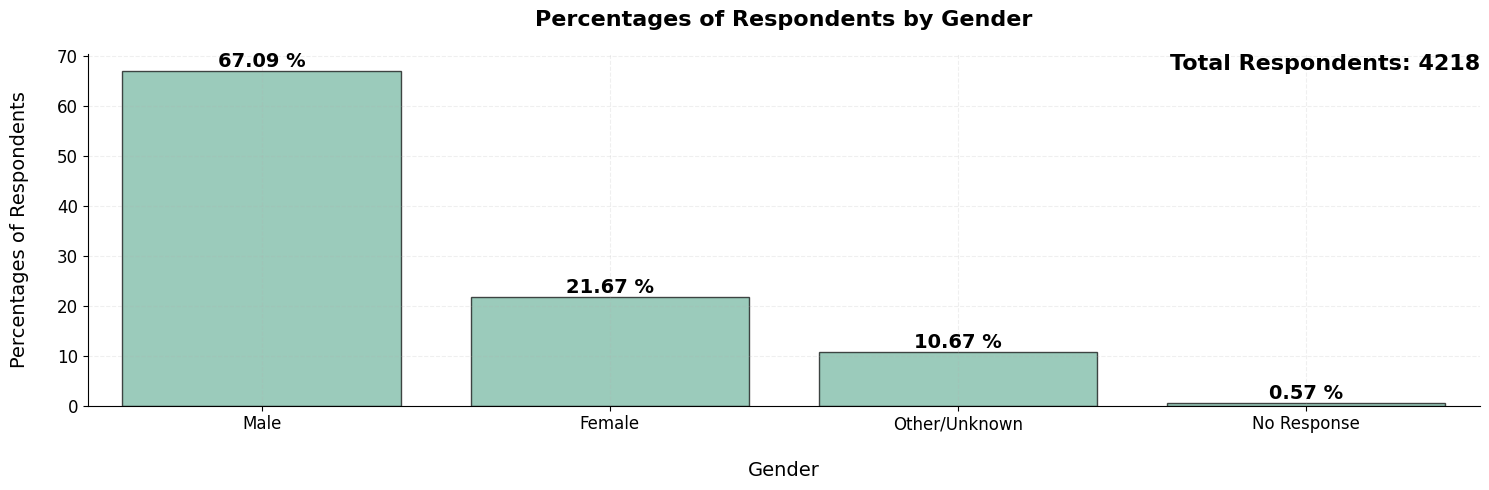

In [19]:
respondents_gender_query = """
WITH respondents_gender AS (
    SELECT 
        CASE 
            WHEN a.AnswerText = "Male" THEN "Male"
            WHEN a.AnswerText = "Female" THEN "Female"
            WHEN a.AnswerText = "-1" THEN "No Response"
            ELSE "Other/Unknown"
        END AS gender
    FROM Answer a
    JOIN Question o ON a.QuestionID = o.QuestionID
    WHERE a.QuestionID = 2
),
gender_counts AS (
    SELECT 
        gender,
        COUNT(*) AS total
    FROM respondents_gender
    GROUP BY 1
),
total_respondents AS (
    SELECT 
        SUM(total) AS total_count
    FROM gender_counts
)
SELECT 
    g.gender,
    g.total,
    (g.total * 100.0 / t.total_count) AS percentage
FROM gender_counts g
JOIN total_respondents t
ORDER BY 2 DESC;
"""

respondents_gender = sql_connection(db_path, respondents_gender_query)
respondents_gender_percentage(respondents_gender, "gender", "percentage", "total")

`Males` had the most responses, followed by `females`. We also observe responses from individuals who selected `"Other/Unknown"` or preferred not to disclose their gender. Additionally, 0.57% of respondents did not answer this question at all. We can assume that majority of respondents are `males`.

---
### Querying Respondents Age

This section demonstrates how to query the `ages of respondents`.

**What is the distribution of respondents ages?**

---
### Querying Respondents Age with Specific Range

This section demonstrates query of `ages of respondents`.

In [20]:
working_age_query = """
    SELECT 
        o.QuestionText AS question,
        CAST(a.AnswerText AS INT) AS age
    FROM Answer a
    JOIN Question o ON a.QuestionID = o.QuestionID
    WHERE a.QuestionID = 1
    ORDER BY 2
"""

working_age = sql_connection(db_path, working_age_query)
working_age

,question,age
0,What Is Your Age?,-29
1,What Is Your Age?,-1
2,What Is Your Age?,-1
3,What Is Your Age?,-1
4,What Is Your Age?,-1
...,...,...
4213,What Is Your Age?,72
4214,What Is Your Age?,74
4215,What Is Your Age?,99
4216,What Is Your Age?,323


Working age dataset shows that respondents ages range from -29 to 329 years, indicating that there is incorrect data in the dataset.

---
### Querying Respondents Age (14-65)

Categorizes ages of respondents who are in age range of `14 to 65 years (United States Labor age)`. The ages are cleaned and only valid age responses are included.

In [21]:
respondents_age_query = """
SELECT 
    o.QuestionText AS question,
    ABS(CAST(a.AnswerText AS INT)) AS age
FROM Answer a
JOIN Question o ON a.QuestionID = o.QuestionID
WHERE a.QuestionID = 1
    AND CAST(a.AnswerText AS INT) >= 14
    AND CAST(a.AnswerText AS INT) <= 65
ORDER BY 2 DESC;
"""

respondents_age = sql_connection(db_path, respondents_age_query)
respondents_age.describe()

,age
count,4197.000000
mean,33.792947
std,7.950620
min,15.000000
25%,28.000000
50%,33.000000
75%,38.000000
max,65.000000


We took have `4196` respondents provided their age and in range of working age from `14 till 65`. 

- The average age is approximately `33.80 years`. 

- The age distribution has a standard deviation of `7.95 years`, indicating moderate variability. 

- The youngest respondent is `15 years old`. 

- 25% of respondents are `28 years old or younger`. The median age is `33 years`, meaning half of the respondents are `younger than 33`. 

- 75% of respondents are `38 years old or younger`.The oldest respondent is `65 years old`.

This suggests that the respondents are generally `young within the typical working age range`, with the majority between `15 and 65 years old`.

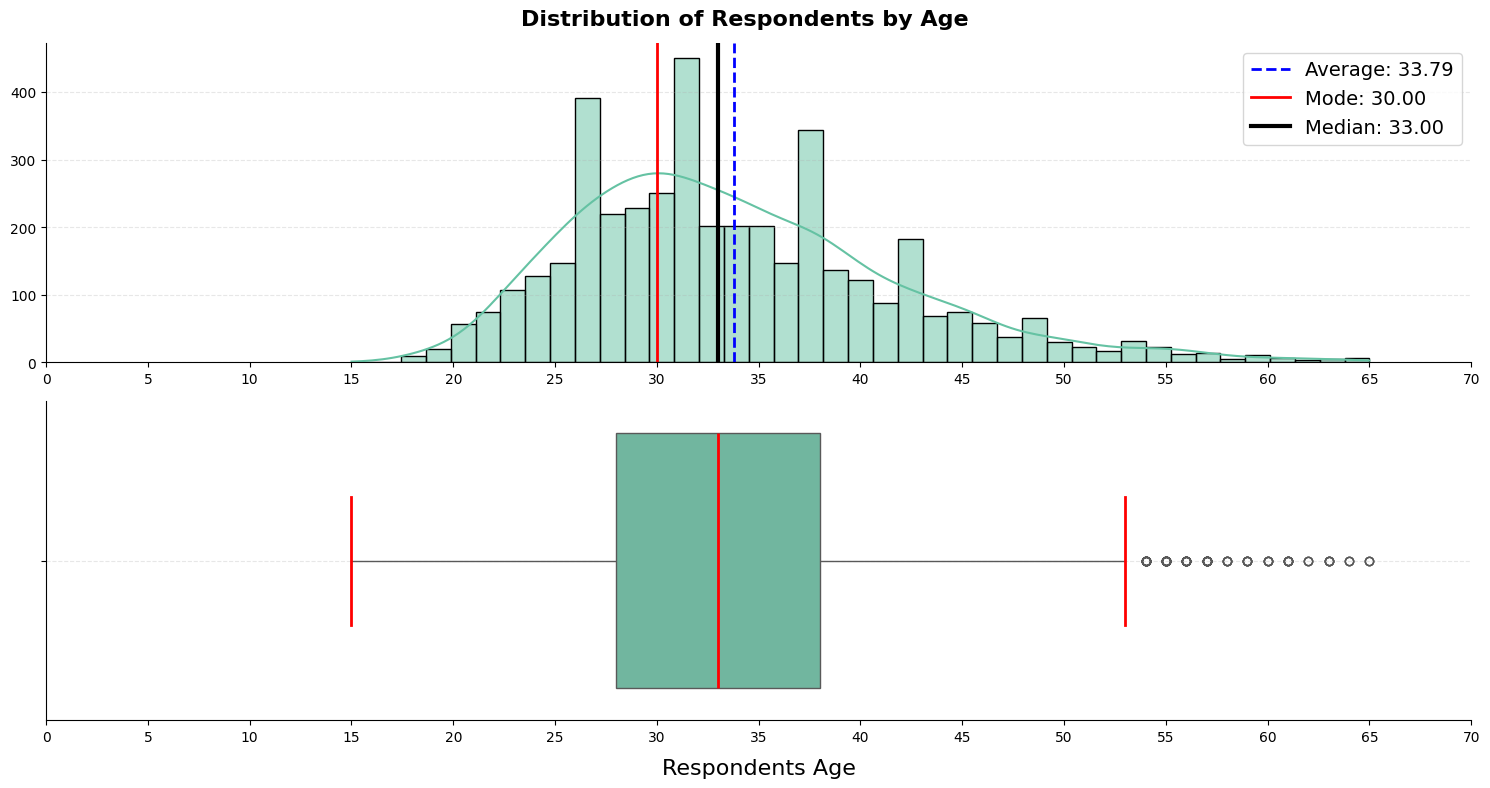

In [22]:
respondents_distribution(respondents_age, "age")

**Histogram**

The histogram shows `distribution of respondents across different age groups`. The distribution is skewed to the right, indicating that a larger proportion of respondents are younger. The peak of the distribution lies `between 22 and 45 years`, suggesting that this age group has the `highest representation`.

**Box Plot**

The median age appears to be `around 33 years`. The box represents the interquartile range (IQR), indicating that 50% of the respondents fall within `age of 27 and 38`. The whiskers extend beyond the box to capture the range of the data, excluding outliers. The presence of outliers on the right side of the box plot confirms the `right-skewed nature` of the distribution.

**Summary Statistics**

The average (mean) age is `33.80 years.`
The mode (most frequent age) is `30 years.`
The median age is `33 years`.

The data suggests that the survey primarily targeted `younger individuals`, with a significant proportion of respondents falling within the `20-40 age group`. The presence of outliers on the higher end of the age range indicates that there are some older individuals in the sample. The median being close to the mean and mode suggests a relatively symmetrical distribution around the central tendency, despite the right-skewness.

---
### Querying Respondents Career Levels by Age Group

Categorizes respondents `different career levels` based on their age. The ages are grouped into four categories: `Early Work Career, Mid-Career, Late Career, and Pre-Retirement.` The percentage of respondents in each career level is calculated based on the total number of respondents.

**What is the career level distribution among respondents based on age?**

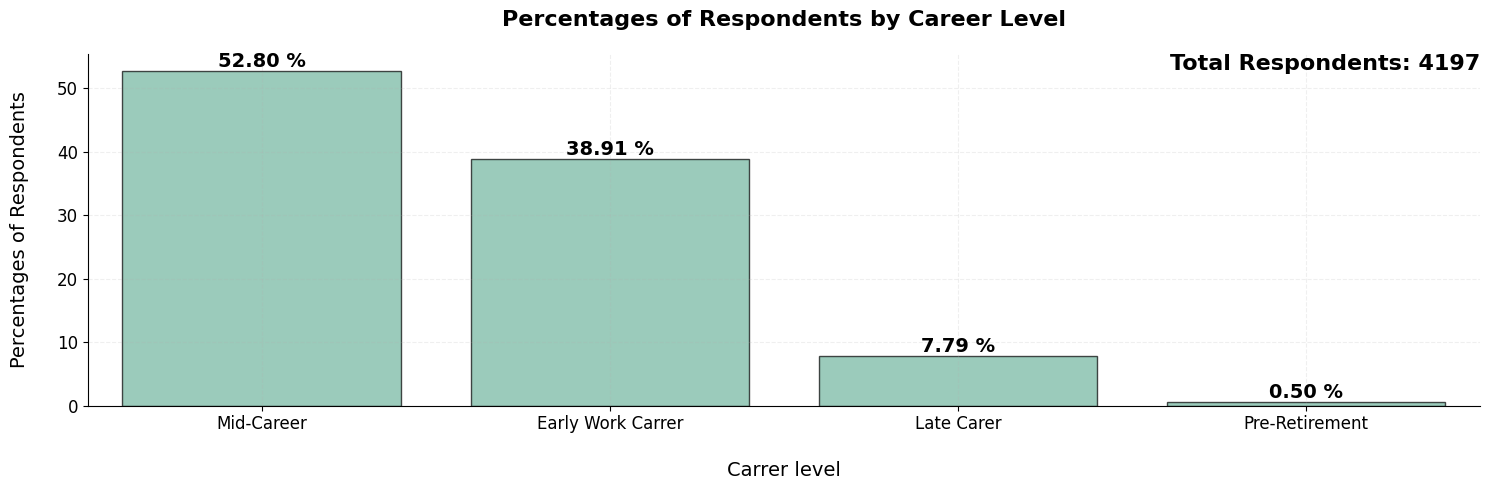

In [23]:
working_age_query = """
WITH respondents_age AS (
SELECT 
    o.QuestionText AS question,
    ABS(CAST(a.AnswerText AS INT)) AS answer_text
FROM Answer a
JOIN Question o ON a.QuestionID = o.QuestionID
WHERE a.QuestionID = 1
    AND CAST(a.AnswerText AS INT) <= 100
ORDER BY 2 DESC
),
career_levels AS (
    SELECT 
        CASE 
            WHEN answer_text BETWEEN 14 AND 30 THEN "Early Work Carrer"
            WHEN answer_text BETWEEN 31 AND 45 THEN "Mid-Career"
            WHEN answer_text BETWEEN 46 AND 60 THEN "Late Carer"
            WHEN answer_text BETWEEN 61 AND 65 THEN "Pre-Retirement"
        END AS career_level,
        COUNT(*) AS total
    FROM respondents_age
    WHERE answer_text >= 16
        AND answer_text <= 65
    GROUP BY career_level
),
total_respondents AS (
    SELECT 
        SUM(total) AS total_count
    FROM career_levels
)
SELECT 
    c.career_level,
    c.total,
    (c.total * 100.0 / t.total_count) AS percentage
FROM career_levels c
JOIN total_respondents t
ORDER BY c.total DESC;
"""

working_age = sql_connection(db_path, working_age_query)
respondents_career_level_percentage(working_age, "career_level", "percentage", "total")

The majority of respondents fall into the Mid-Career (31-45) and Early Career (16-30) age groups, followed by Late Career (46-60). We can confidently say that the survey primarily targeted younger individuals, with a significant proportion of respondents in the 20-40 age range.

---
### Querying Respondents Country Distribution

This section demonstrates respondents `country information` from the survey data. The query replaces "United States of America" with "United States" to ensure consistency and then counts the occurrences of each country.

**Which countries/continents do the respondents live in?**

In [24]:
respondents_country_query = """
WITH respondents_country AS (
    SELECT 
        REPLACE(a.AnswerText, "United States of America", "United States") AS country
    FROM Answer a
    JOIN Question o ON a.QuestionID = o.QuestionID
    WHERE a.QuestionID = 3
),
country_counts AS (
    SELECT 
        country,
        COUNT(*) AS total
    FROM respondents_country
    GROUP BY 1
)
SELECT 
    country,
    total
FROM country_counts
ORDER BY 2 DESC;
"""

respondents_country = sql_connection(db_path, respondents_country_query)
respondents_country.head(5)

,country,total
0,United States,2604
1,United Kingdom,482
2,Canada,199
3,Germany,136
4,Netherlands,98


These numbers indicate a strong representation of respondents living in the United States, with less participation from other countries.

---
### Querying Respondents Continent Distribution

Categoriezes espondents by their continent `based on their country of living`. Each country added to its corresponding continent. Then it calculates the `percentage` of respondents from each continent

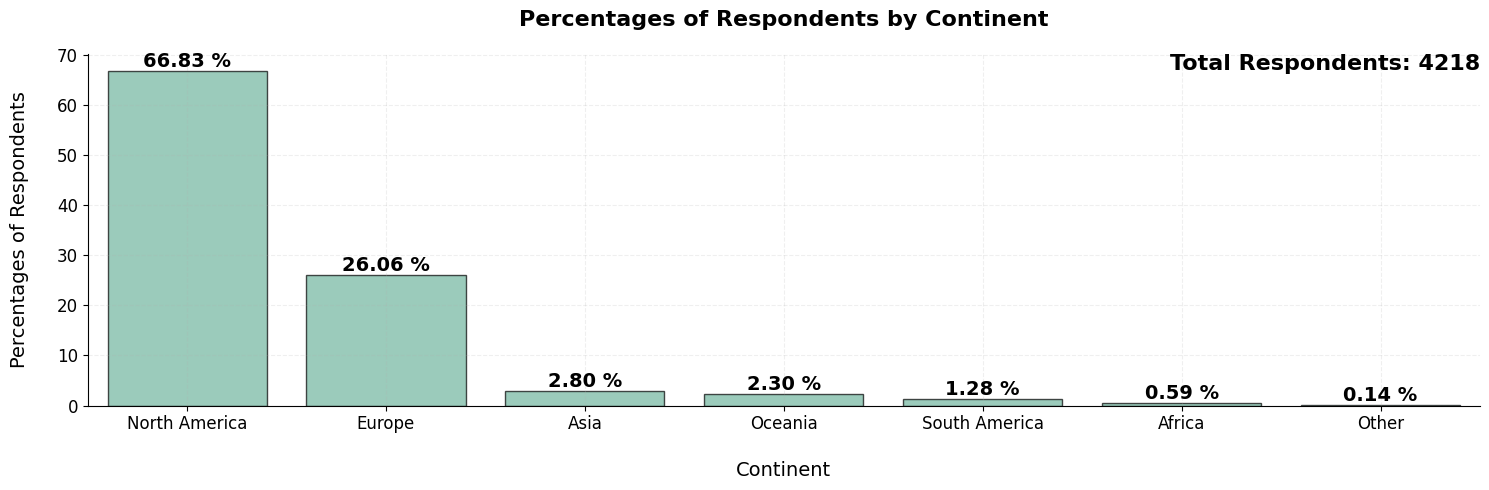

In [25]:
respondents_continent_query = """
WITH respondents_country AS (
    SELECT 
        CASE
            WHEN a.AnswerText = "United States of America" THEN "United States"
            WHEN a.AnswerText = "United States" THEN "United States"
            ELSE a.AnswerText
        END AS country
    FROM Answer a
    JOIN Question o ON a.QuestionID = o.QuestionID
    WHERE a.QuestionID = 3
),
country_continent AS (
    SELECT 
        country,
        CASE
            WHEN country IN ("United States", "Canada", "Mexico", "Bahamas, The", "Guatemala", "Costa Rica") THEN "North America"
            WHEN country IN ("United Kingdom", "Germany", "Netherlands", "France", "Ireland", "Sweden", "Switzerland", "Spain", "Portugal", "Poland", "Italy", "Belgium", "Norway", "Austria", "Denmark", "Romania", "Greece", "Bulgaria", "Finland", "Czech Republic", "Estonia", "Croatia", "Hungary", "Serbia", "Bosnia and Herzegovina", "Slovakia", "Iceland", "Latvia", "Lithuania", "Ukraine", "Belarus", "Moldova", "Slovenia", "Turkey") THEN "Europe"
            WHEN country IN ("Australia", "New Zealand") THEN "Oceania"
            WHEN country IN ("India", "Russia", "China", "Japan", "Pakistan", "Bangladesh", "Indonesia", "Israel", "Singapore", "Turkey", "Afghanistan", "Bangladesh", "Hong Kong", "Georgia", "Iran", "Jordan", "Philippines", "Saudi Arabia", "Taiwan", "Thailand", "Vietnam") THEN "Asia"
            WHEN country IN ("Brazil", "Argentina", "Colombia", "Chile", "Uruguay", "Venezuela", "Ecuador") THEN "South America"
            WHEN country IN ("South Africa", "Algeria", "Nigeria", "Kenya", "Mauritius", "Ghana", "Ethiopia", "Uganda", "Zimbabwe") THEN "Africa"
            ELSE "Other"
        END AS continent
    FROM respondents_country
),
total_respondents AS (
    SELECT COUNT(*) AS total_count
    FROM country_continent
)
SELECT 
    c.continent,
    COUNT(*) AS total,
    COUNT(*) * 100.0 / t.total_count AS percentage
FROM country_continent c
JOIN total_respondents t 
GROUP BY 1
ORDER BY 2 DESC;
"""

respondents_continent = sql_connection(db_path, respondents_continent_query)
respondents_continent_percentage(respondents_continent, "continent", "percentage", "total")

The majority of respondents are living in North America, followed by Europe and other continents.

---

### Querying Respondents Working Place

Categorizes respondents based on their `working place`. It computes the number and percentage of respondents working in the `United States` versus other countries.

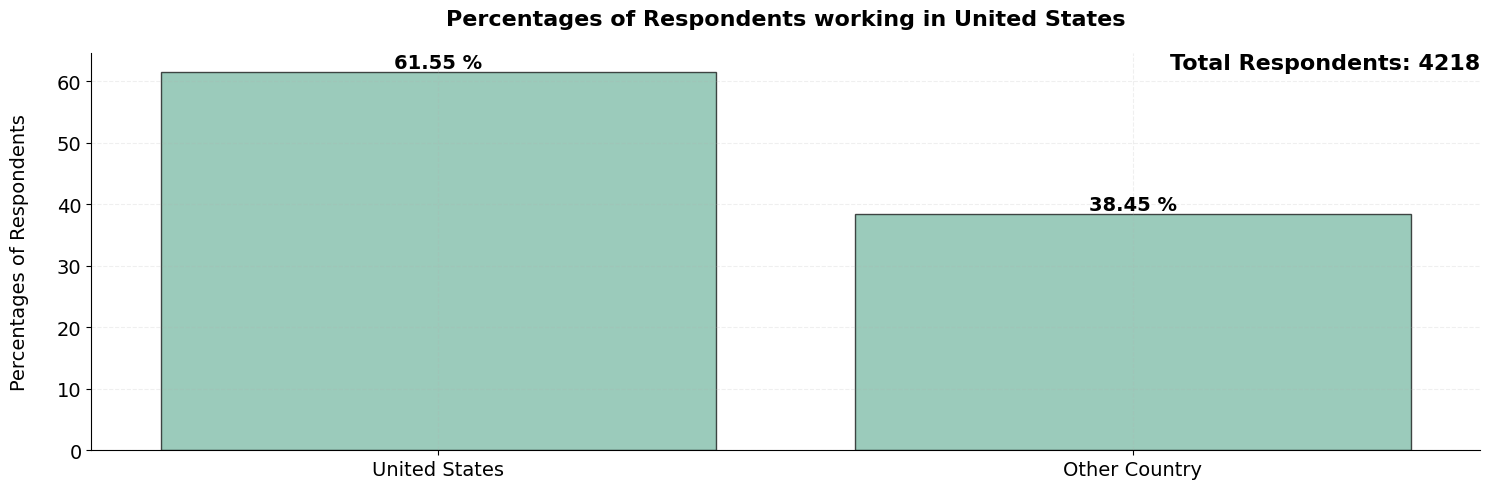

In [26]:
state_or_other_country_query = """
WITH state AS (
    SELECT 
        o.QuestionText AS question,
        a.AnswerText AS state
    FROM Answer a
    JOIN Question o ON a.QuestionID = o.QuestionID
    WHERE a.QuestionID = 4
),
total_respondents AS (
    SELECT COUNT(*) AS total_count
    FROM state
)
SELECT
    CASE 
        WHEN state = "-1" THEN "Other Country"
        WHEN state != "-1" THEN "United States"
    END AS living,
    COUNT(*) AS total,
    (COUNT(*) * 100.0 / t.total_count) AS percentage
FROM state s
JOIN total_respondents t
GROUP BY living
ORDER BY total DESC;
"""

state_or_other_country = sql_connection(db_path, state_or_other_country_query)
us_or_other_country(state_or_other_country, "living", "percentage", "total")

61.55 % of the respondents working in United states.

---
### Querying Total Mental Health Respondents TOP 5

This query computes the total number of respondents with `mental health problems`, focusing on the `top 5 responses`.

**What are the most common mental health issues reported by respondents?**

In [27]:
total_mental_healt_top5 = """
WITH mental_health AS (
    SELECT 
        CASE 
            WHEN a.AnswerText = -1 THEN "No Mental Health Problems"
            ELSE a.AnswerText 
        END AS mental_health,
        COUNT(*) AS total
    FROM Answer a
    JOIN Question o ON a.QuestionID = o.QuestionID
    JOIN Survey s ON a.SurveyID = s.SurveyID
    WHERE a.QuestionID = 115
    GROUP BY 1
)
SELECT 
    mental_health,
    total
FROM mental_health
ORDER BY total DESC
LIMIT 5;
"""
total_mental_healt_top5 = sql_connection(db_path, total_mental_healt_top5)
total_mental_healt_top5


,mental_health,total
0,No Mental Health Problems,865
1,"Mood Disorder (Depression, Bipolar Disorder, Etc)",412
2,"Anxiety Disorder (Generalized, Social, Phobia,...",345
3,Attention Deficit Hyperactivity Disorder,121
4,Post-Traumatic Stress Disorder,69


---
### Querying Total Mental Health Respondents

This section calculates the `total number of respondents` who reported mental health problems and the `percentage of respondents` who mentioned the `top 5 most common mental health issues`.

In [28]:
total_mental_healt_respondents = """
WITH mental_health AS (
    SELECT 
        CASE 
            WHEN a.AnswerText = -1 THEN "No Mental Health Problems"
            ELSE a.AnswerText 
        END AS mental_health,
        COUNT(*) AS total
    FROM Answer a
    JOIN Question o ON a.QuestionID = o.QuestionID
    JOIN Survey s ON a.SurveyID = s.SurveyID
    WHERE a.QuestionID = 115
    GROUP BY 1
), 
total_respondents AS (
    SELECT COUNT(*) AS total_count
    FROM Answer a
    WHERE a.QuestionID = 115
),
top_mental_health AS (
    SELECT 
        mental_health,
        total
    FROM mental_health
    ORDER BY total DESC
    LIMIT 5
)
SELECT 
    tr.total_count AS total_respondents,
    SUM(th.total) AS total_top5_respondents,
    (SUM(th.total) * 100.0 / tr.total_count) AS percentage
FROM total_respondents tr
JOIN top_mental_health th
"""

total_mental_health = sql_connection(db_path, total_mental_healt_respondents)
total_mental_health

,total_respondents,total_top5_respondents,percentage
0,2072,1812,87.451737


Out of all 4218 respondents in this survey from year period of 2016 till 2019, 2072 answered the question about mental health issues. Of these, top 5 (1812 respondents) reported having mental health problems, which constitutes 87.45% of all respondents who answered this question.

---
### Analyzing Mental Health Issues Distribution

This section demonstrates `mental health-related` data from the survey responses. Calculates the number of respondents reporting specific issues and computes their `percentage distribution`. Additionally, `confidence intervals` are calculated for the estimates.

In [29]:
mental_healt_query = """
WITH mental_health AS (
    SELECT 
        CASE 
            WHEN a.AnswerText = -1 THEN "No Mental Health Problems"
            ELSE a.AnswerText 
        END AS mental_health,
        COUNT(*) AS total
    FROM Answer a
    JOIN Question o ON a.QuestionID = o.QuestionID
    JOIN Survey s ON a.SurveyID = s.SurveyID
    WHERE a.QuestionID = 115
    GROUP BY 1
), 
total_respondents AS (
    SELECT COUNT(*) AS total_count
    FROM Answer a
    WHERE a.QuestionID = 115
)
SELECT 
    m.mental_health,
    m.total,
    (m.total * 100.0 / t.total_count) AS percentage
FROM mental_health m
JOIN total_respondents t
ORDER BY 3 DESC
LIMIT 10;
"""

mental_health = sql_connection(db_path, mental_healt_query)

replacements = {
    "Mood Disorder (Depression, Bipolar Disorder, Etc)": "Mood Disorder",
    "Anxiety Disorder (Generalized, Social, Phobia, Etc)": "Anxiety Disorder",
    "Attention Deficit Hyperactivity Disorder": "ADHD",
    "Post-Traumatic Stress Disorder": "PTSD",
    "Personality Disorder (Borderline, Antisocial, Paranoid, Etc)": "Personality Disorder"	
}

mental_health["mental_health"] = mental_health["mental_health"].replace(replacements)

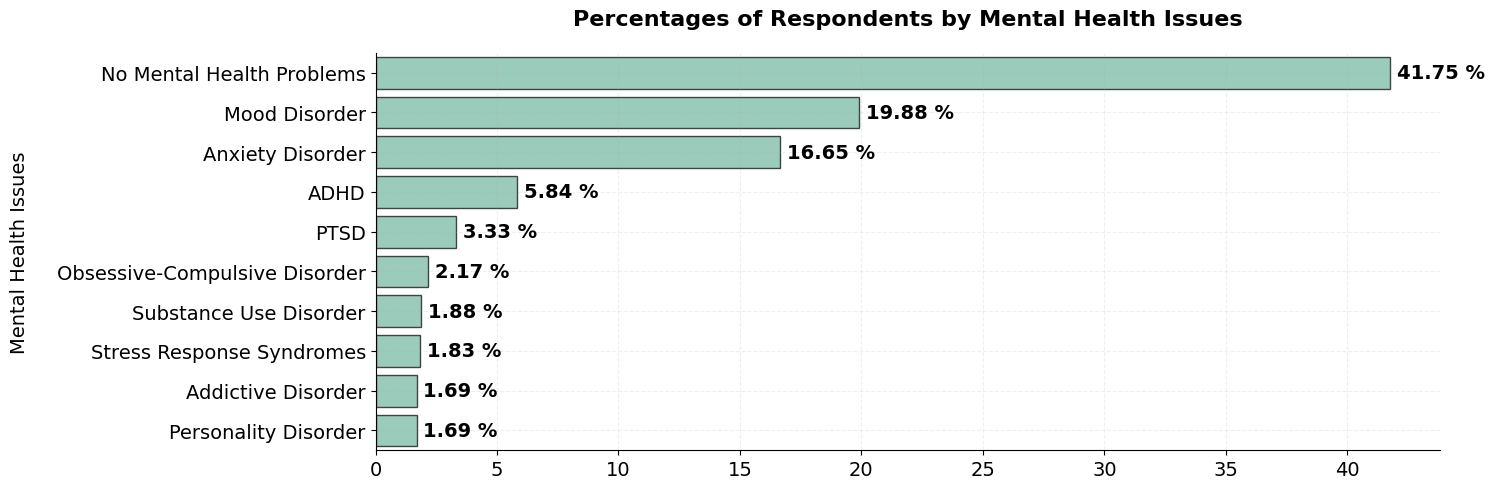

In [30]:
mental_health_top(mental_health, "percentage", "mental_health")

---
### Calculating Confidence Intervals for Mental Health Data

Calculating `confidence intervals `for the proportions of mental health issues by gender. The code computes the `standard error` for each group and then calculates the `lower and upper bounds` of the confidence intervals, using a confidence level of 1.96 (`for a 95% confidence interval`).

In [31]:
conf = 1.96
mental_health["proportion"] = mental_health["percentage"] / 100
mental_health["standard_error"] = np.sqrt(mental_health["proportion"] * (1 - mental_health["proportion"]) / mental_health["total"])
mental_health["conf_lower"] = np.maximum(0, mental_health["proportion"] - conf * mental_health["standard_error"])
mental_health["conf_upper"] = mental_health["proportion"] + conf * mental_health["standard_error"]

mental_health

,mental_health,total,percentage,proportion,standard_error,conf_lower,conf_upper
0,No Mental Health Problems,865,41.747104,0.417471,0.016767,0.384607,0.450335
1,Mood Disorder,412,19.884170,0.198842,0.019664,0.160301,0.237382
2,Anxiety Disorder,345,16.650579,0.166506,0.020057,0.127195,0.205817
3,ADHD,121,5.839768,0.058398,0.021318,0.016615,0.100180
4,PTSD,69,3.330116,0.033301,0.021600,0.000000,0.075637
5,Obsessive-Compulsive Disorder,45,2.171815,0.021718,0.021729,0.000000,0.064307
6,Substance Use Disorder,39,1.882239,0.018822,0.021761,0.000000,0.061474
7,Stress Response Syndromes,38,1.833977,0.018340,0.021766,0.000000,0.061002
8,Addictive Disorder,35,1.689189,0.016892,0.021782,0.000000,0.059585
9,Personality Disorder,35,1.689189,0.016892,0.021782,0.000000,0.059585


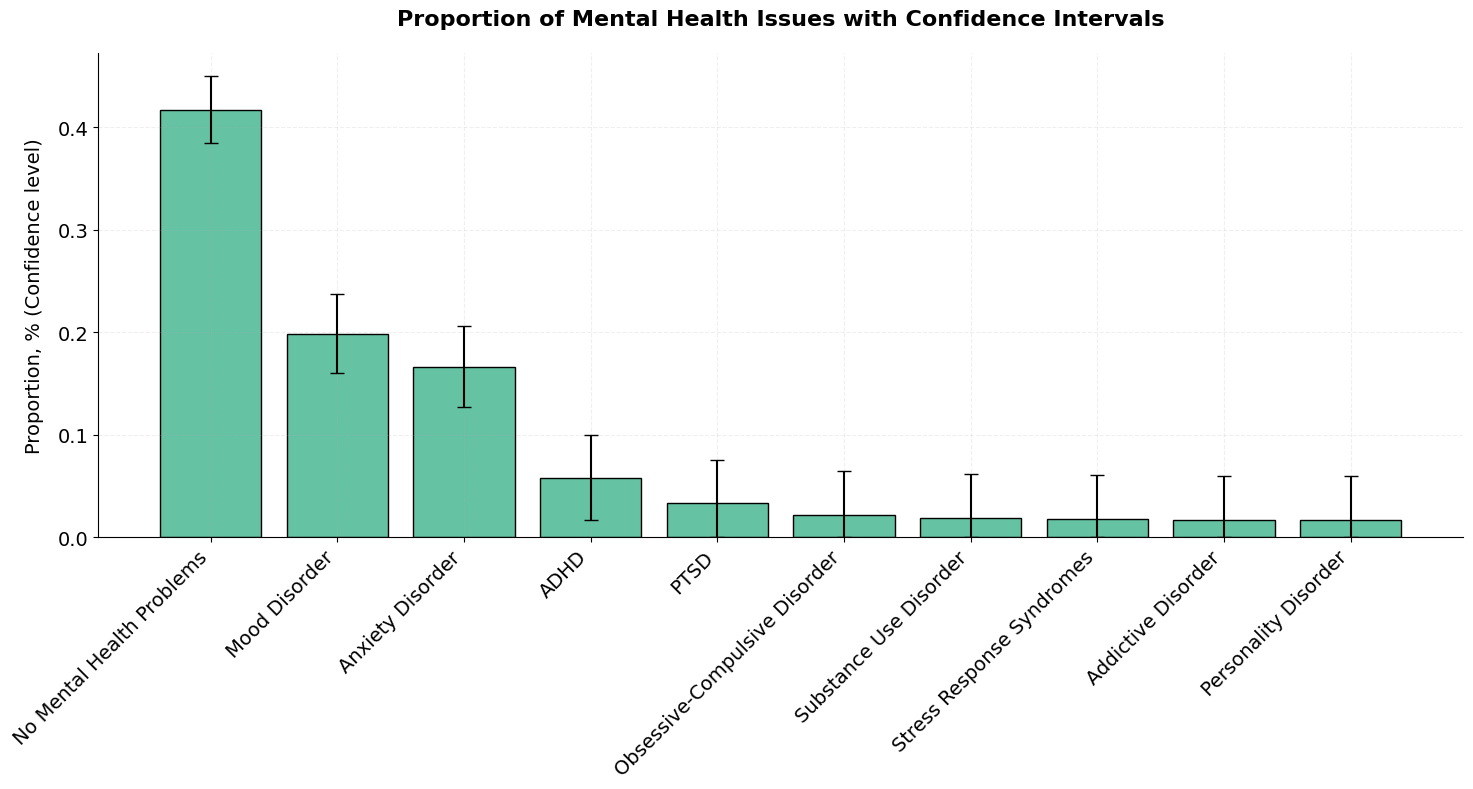

In [32]:
mental_health_top_conf(mental_health, "mental_health", "proportion", "conf_lower", "conf_upper")

`No Mental Health Problems:` percentage is 41.75%, with a confidence interval from 38.46% to 45.03%. This means we can be 95% confident that the actual proportion of people without mental health problems is somewhere between 38.46% and 45.03% in the full population.

`Mood Disorder:` percentage is 19.88%, with a confidence interval from 16.03% to 23.74%. This suggests the true proportion of people with mood disorders in the population likely falls within that range.

This data shows that the majority of respondents either report no mental health problems or experience mood and anxiety disorders. Smaller proportions report other mental health conditions like ADHD (Attention Deficit Hyperactivity Disorder), PTSD (Post-Traumatic Stress Disorder), and various addictive or personality disorders.

Disorders with larger populations (e.g., Mood Disorder, Anxiety Disorder) tend to have narrower confidence intervals, indicating that their estimates are more precise

Majority of respondents (41.75%) report having "No Mental Health Problems". Next most common issues are "Mood Disorder" (19.88%) and "Anxiety Disorder" (16.65%)

---
### Analyzing Mental Health by Gender

This section demonstrates health responses based on `gender`. The query categorizes mental health issues by gender, calculates the percentage of each mental health issue within each gender group, and ranks them by percentage. Additionally, `confidence intervals` are calculated for the estimates.

In [33]:
mental_healt_query = """
WITH respondents_gender AS (
    SELECT 
        a.UserID,
        CASE 
            WHEN a.AnswerText = "Male" THEN "Male"
            WHEN a.AnswerText = "Female" THEN "Female"
            WHEN a.AnswerText = "-1" THEN "No Response"
            ELSE "Other/Unknown"
        END AS gender
    FROM Answer a
    JOIN Question o ON a.QuestionID = o.QuestionID
    WHERE a.QuestionID = 2
),
mental_health AS (
    SELECT 
        CASE 
            WHEN a.AnswerText = "-1" THEN "No Mental Health Problems" 
            ELSE a.AnswerText 
        END AS mental_health,
        rg.gender,
        COUNT(*) AS total
    FROM Answer a
    JOIN respondents_gender rg ON a.UserID = rg.UserID 
    WHERE a.QuestionID = 115
    GROUP BY 1, 2
)
SELECT 
    mh.mental_health,
    mh.gender,
    mh.total,
    (mh.total * 100.0 / SUM(mh.total) OVER (PARTITION BY mh.gender)) AS percentage
FROM mental_health mh
ORDER BY 2, 4 DESC;
"""

replacements = {
    "Mood Disorder (Depression, Bipolar Disorder, Etc)": "Mood Disorder",
    "Anxiety Disorder (Generalized, Social, Phobia, Etc)": "Anxiety Disorder",
    "Attention Deficit Hyperactivity Disorder": "ADHD",
    "Post-Traumatic Stress Disorder": "PTSD"
}

mental_health = sql_connection(db_path, mental_healt_query)
mental_health["rank"] = mental_health.groupby("gender")["percentage"].rank(method="first", ascending=False)
mental_health["mental_health"] = mental_health["mental_health"].replace(replacements)

top5_by_gender = mental_health[mental_health["rank"] <= 5]
top5_by_gender = top5_by_gender.sort_values(by=["gender", "rank"])

The difference of individuals with mental health issues in males and females shows noticeable differences. For females, mood disorders and anxiety disorders are significant issues, while for males, the prevalence of mood disorders and anxiety disorders are less common.

Mood Disorder and Anxiety Disorder stand out as the most commonly reported conditions across all gender groups. In both males and females, mood and anxiety disorders collectively account for a significant portion of the sample.

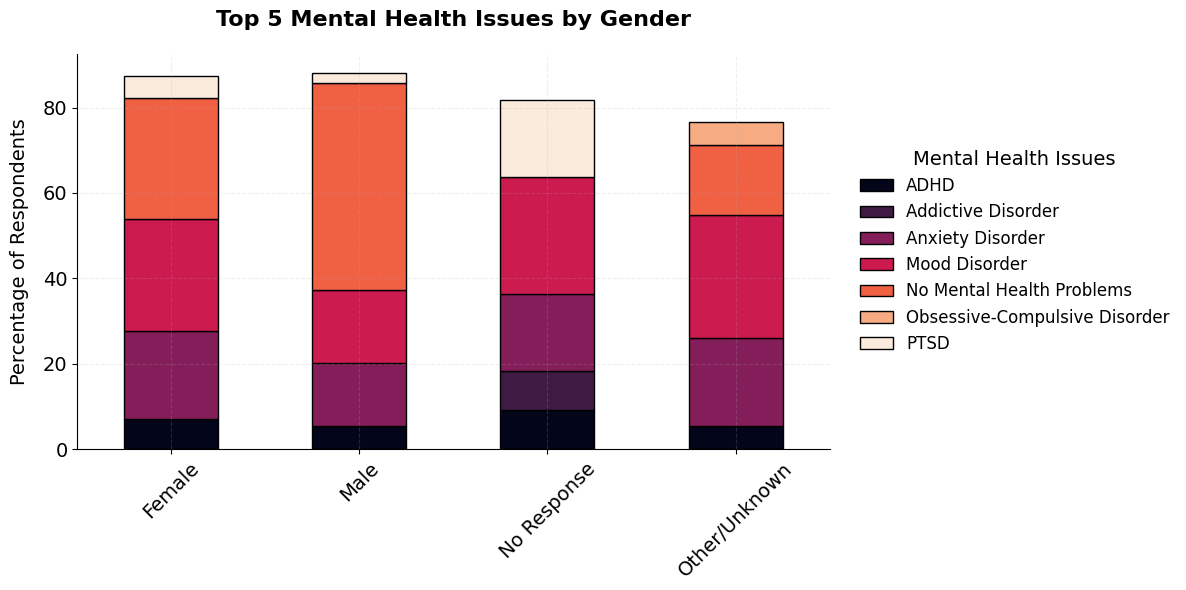

In [34]:
mental_health_gender(top5_by_gender, "gender", "mental_health", "percentage")

In [35]:
conf = 1.96
top5_by_gender["proportion"] = top5_by_gender["percentage"] / 100
top5_by_gender["standard_error"] = np.sqrt(top5_by_gender["proportion"] * (1 - top5_by_gender["proportion"]) / top5_by_gender["total"])
top5_by_gender["conf_lower"] = np.maximum(0, top5_by_gender["proportion"] - conf * top5_by_gender["standard_error"])
top5_by_gender["conf_upper"] = top5_by_gender["proportion"] + conf  * top5_by_gender["standard_error"]

top5_by_gender

,mental_health,gender,total,percentage,rank,proportion,standard_error,conf_lower,conf_upper
0,No Mental Health Problems,Female,159,28.443649,1.0,0.284436,0.035778,0.214311,0.354562
1,Mood Disorder,Female,146,26.118068,2.0,0.261181,0.036355,0.189925,0.332436
2,Anxiety Disorder,Female,115,20.572451,3.0,0.205725,0.037695,0.131843,0.279606
3,ADHD,Female,40,7.155635,4.0,0.071556,0.040754,0.000000,0.151434
4,PTSD,Female,28,5.008945,5.0,0.050089,0.041223,0.000000,0.130886
17,No Mental Health Problems,Male,694,48.565430,1.0,0.485654,0.018972,0.448469,0.522839
18,Mood Disorder,Male,242,16.934920,2.0,0.169349,0.024110,0.122094,0.216604
19,Anxiety Disorder,Male,213,14.905528,3.0,0.149055,0.024403,0.101226,0.196884
20,ADHD,Male,76,5.318404,4.0,0.053184,0.025740,0.002733,0.103635
21,PTSD,Male,35,2.449265,5.0,0.024493,0.026128,0.000000,0.075703


A large proportion of females (28.44%) report having no mental health problems, but the distribution of conditions varies slightly. Mood disorders (26.12%) and anxiety disorders (20.57%) are the most common, with ADHD (7.16%) and PTSD (5.01%) being less prevalent.

The majority of males (48.57%) alsso report having no mental health problems, followed by 16.93% reporting mood disorders and 14.91% reporting anxiety disorders. The prevalence of conditions like ADHD (5.32%) and PTSD (2.45%) is much lower in males.

"No Response" category shows a very small number of cases for each condition (e.g., 3 individuals reporting mood disorder, 2 reporting anxiety disorder), which might not provide reliable insights due to the low sample size.

"Other/Unknown" category presents a different distribution, with the most common condition being mood disorder (28.77%), followed by anxiety disorder (20.55%) and no mental health problems (16.44%). Given the small sample size in this category, these findings should be interpreted carefully.

---
### Analyzing Mental Health by Gender in Tech Companies

This section demonstrates health responses based on `gender in tech companies`. The query categorizes mental health issues by gender, calculates the percentage of each mental health issue within each gender group, and ranks them by percentage. Additionally, `confidence intervals` are calculated for the estimates.

**What are the most common mental health issues among respondents in tech companies?**

In [36]:
mental_healt_query = """
WITH categorized_users AS (
    SELECT
        q1.UserID,
        CASE
            WHEN q1.AnswerText = 1 THEN "Tech Company"
            WHEN q1.AnswerText = 0 THEN "Not Specified"
            ELSE "Non-Tech Company"
        END AS company,
        CASE 
            WHEN q2.AnswerText = "Male" THEN "Male"
            WHEN q2.AnswerText = "Female" THEN "Female"
            WHEN q2.AnswerText = "-1" THEN "No Response"
            ELSE "Other/Unknown"
        END AS gender,
        CASE 
            WHEN q3.AnswerText = "-1" THEN "No Mental Health Problems"
            ELSE q3.AnswerText
        END AS mental_health
    FROM Answer q1
    JOIN Answer q2 ON q1.UserID = q2.UserID AND q2.QuestionID = 2
    JOIN Answer q3 ON q1.UserID = q3.UserID AND q3.QuestionID = 115
    WHERE q1.QuestionID = 9
),
grouped_data AS (
    SELECT
        company,
        gender,
        mental_health,
        COUNT(*) AS total
    FROM categorized_users
    GROUP BY company, gender, mental_health
)
SELECT
    company,
    gender,
    mental_health,
    total,
    (total * 100.0 / SUM(total) OVER (PARTITION BY gender)) AS percentage
FROM grouped_data
WHERE company = "Tech Company"
ORDER BY gender, mental_health;
"""

mental_health = sql_connection(db_path, mental_healt_query)

replacements = {
    "Mood Disorder (Depression, Bipolar Disorder, Etc)": "Mood Disorder",
    "Anxiety Disorder (Generalized, Social, Phobia, Etc)": "Anxiety Disorder",
    "Attention Deficit Hyperactivity Disorder": "ADHD",
    "Post-Traumatic Stress Disorder": "PTSD"
}

mental_health["rank"] = mental_health.groupby("gender")["percentage"].rank(method="first", ascending=False)
mental_health["mental_health"] = mental_health["mental_health"].replace(replacements)

top5_by_gender_tech = mental_health[mental_health["rank"] <= 5]
top5_by_gender_tech = top5_by_gender_tech.sort_values(by=["gender", "rank"])

Mental health conditions like Mood Disorders and Anxiety Disorders are more prevalent in females than males, with females also reporting ADHD at higher rates. 

Males tend to report No Mental Health Problems more frequently (49.5%), and they report Mood Disorders and Anxiety Disorders less frequently than females. 

Other/Unknown and No Response groups have small sample sizes, leading to less reliable estimates, but still show a significant presence of Mood Disorders and Anxiety Disorders.

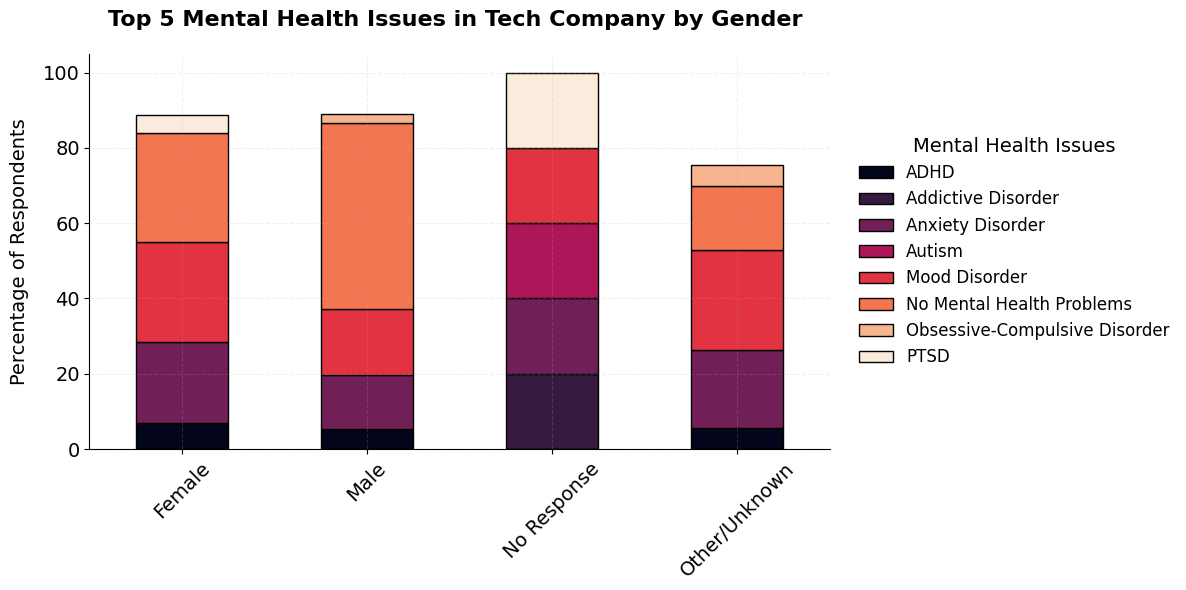

In [37]:
mental_health_tech(top5_by_gender_tech, "gender", "mental_health", "percentage")

In [38]:
conf = 1.96
top5_by_gender_tech["proportion"] = top5_by_gender_tech["percentage"] / 100
top5_by_gender_tech["standard_error"] = np.sqrt(top5_by_gender_tech["proportion"] * (1 - top5_by_gender_tech["proportion"]) / top5_by_gender_tech["total"])
top5_by_gender_tech["conf_lower"] = np.maximum(0, top5_by_gender_tech["proportion"] - conf * top5_by_gender_tech["standard_error"])
top5_by_gender_tech["conf_upper"] = top5_by_gender_tech["proportion"] + conf * top5_by_gender_tech["standard_error"]

top5_by_gender_tech

,company,gender,mental_health,total,percentage,rank,proportion,standard_error,conf_lower,conf_upper
6,Tech Company,Female,No Mental Health Problems,92,29.022082,1.0,0.290221,0.047319,0.197476,0.382965
5,Tech Company,Female,Mood Disorder,84,26.498423,2.0,0.264984,0.048152,0.170605,0.359363
1,Tech Company,Female,Anxiety Disorder,68,21.451104,3.0,0.214511,0.049778,0.116945,0.312077
2,Tech Company,Female,ADHD,22,6.940063,4.0,0.069401,0.054182,0.000000,0.175597
9,Tech Company,Female,PTSD,15,4.731861,5.0,0.047319,0.054821,0.000000,0.154767
24,Tech Company,Male,No Mental Health Problems,438,49.491525,1.0,0.494915,0.023890,0.448091,0.541739
23,Tech Company,Male,Mood Disorder,154,17.401130,2.0,0.174011,0.030550,0.114133,0.233890
16,Tech Company,Male,Anxiety Disorder,127,14.350282,3.0,0.143503,0.031109,0.082528,0.204477
17,Tech Company,Male,ADHD,48,5.423729,4.0,0.054237,0.032690,0.000000,0.118310
25,Tech Company,Male,Obsessive-Compulsive Disorder,20,2.259887,5.0,0.022599,0.033233,0.000000,0.087735


A significant proportion of females report No Mental Health Problems (29.02%), followed by Mood Disorder (26.50%) and Anxiety Disorder (21.45%). Other conditions such as ADHD (6.94%) and PTSD (4.73%) are reported much less frequently. Female mental health issues show relatively higher percentages than males, with mood disorders and anxiety disorders.

A higher proportion of males report No Mental Health Problems (49.49%) compared to females, but the prevalence of Mood Disorder (17.40%) and Anxiety Disorder (14.35%) is still significant. Males report a much lower percentage of ADHD (5.42%) but tend to have a  Obsessive-Compulsive Disorder (2.26%).

In the Other/Unknown category, Mood Disorder is the most common condition (26.42%), followed by Anxiety Disorder (20.75%), and No Mental Health Problems (16.98%). Sample sizes are still small, but these proportions could indicate higher rates of mental health conditions within this group compared to Males and Females.

---
### Analyzing Mental Health Impact to Productivity Levels

This section analyzes productivity `level of respondents`, focusing on whether they believe their productivity is `affected by mental health issues`. 

In [39]:
productivity_level_query = """
WITH tech_company AS (
    SELECT
        a.UserID AS user,
        CASE
            WHEN a.AnswerText = 1 THEN "Tech Company"
            WHEN a.AnswerText = 0 THEN "Not Specified"
            ELSE "Non-Tech Company"
        END AS company
    FROM Answer a
    JOIN Question q ON a.QuestionID = q.QuestionID
    WHERE a.QuestionID = 9
),
productivity AS (
    SELECT
        a.UserID AS user,
        CASE
            WHEN a.AnswerText = -1 THEN "No"
            ELSE a.AnswerText  
        END AS answer
    FROM Answer a
    JOIN Question q ON a.QuestionID = q.QuestionID
    WHERE a.QuestionID = 54
)
SELECT
    tc.company,
    p.answer,
    COUNT(*) AS total,
    COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (PARTITION BY tc.company) AS percentage
FROM productivity p
JOIN tech_company tc ON p.user = tc.user
GROUP BY 1, 2
ORDER BY 1, 3 DESC;
"""

productivity_level_query = sql_connection(db_path, productivity_level_query)
productivity_level_query

,company,answer,total,percentage
0,Non-Tech Company,Yes,367,72.817460
1,Non-Tech Company,Unsure,60,11.904762
2,Non-Tech Company,Not Applicable To Me,51,10.119048
3,Non-Tech Company,No,26,5.158730
4,Not Specified,No,597,100.000000
5,Tech Company,No,1857,100.000000


In [40]:
conf = 1.96
productivity_level_query["proportion"] = productivity_level_query["percentage"] / 100
productivity_level_query["standard_error"] = np.sqrt(productivity_level_query["proportion"] * (1 - productivity_level_query["proportion"]) / productivity_level_query["total"])
productivity_level_query["conf_lower"] = np.maximum(0, productivity_level_query["proportion"] - conf * productivity_level_query["standard_error"])
productivity_level_query["conf_upper"] = productivity_level_query["proportion"] + conf * productivity_level_query["standard_error"]

productivity_level_query

,company,answer,total,percentage,proportion,standard_error,conf_lower,conf_upper
0,Non-Tech Company,Yes,367,72.817460,0.728175,0.023224,0.682656,0.773693
1,Non-Tech Company,Unsure,60,11.904762,0.119048,0.041808,0.037104,0.200992
2,Non-Tech Company,Not Applicable To Me,51,10.119048,0.101190,0.042230,0.018420,0.183961
3,Non-Tech Company,No,26,5.158730,0.051587,0.043379,0.000000,0.136611
4,Not Specified,No,597,100.000000,1.000000,0.000000,1.000000,1.000000
5,Tech Company,No,1857,100.000000,1.000000,0.000000,1.000000,1.000000


Respondents from non-tech companies (72.82%) believe their productivity is affected by a mental health issue, with smaller groups indicating uncertainty (11.90%) or that it doesn't apply to them (10.12%). In contrast, all respondents from tech companies and those with unspecified company status reported that mental health did not affect their productivity (100%).

---
### Analyzing impact of Mental Health to Career

This query analyzes how being identified as a person with a `mental health issue affects respondents careers`. It categorizes the data based on whether the respondents work in a `tech company`, a non-tech company, or whether the company is unspecified.

In [42]:
affected_carrer = """
WITH tech_company AS (
    SELECT
        a.UserID AS user,
        CASE
            WHEN a.AnswerText = 1 THEN 'Tech Company'
            WHEN a.AnswerText = 0 THEN 'Not Specified'
            ELSE 'Non-Tech Company'
        END AS company
    FROM Answer a
    JOIN Question q ON a.QuestionID = q.QuestionID
    WHERE a.QuestionID = 9
),
productivity AS (
    SELECT
        a.UserID AS user,
        CASE
            WHEN a.AnswerText = -1 THEN 'No'
            WHEN a.AnswerText = 1 THEN 'Yes'
             ELSE 'Maybe'
        END AS answer
    FROM Answer a
    JOIN Question q ON a.QuestionID = q.QuestionID
    WHERE a.QuestionID = 79
)
SELECT
    tc.company,
    p.answer,
    COUNT(*) AS total,
    COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (PARTITION BY tc.company) AS percentage
FROM productivity p
JOIN tech_company tc ON  p.user = tc.user
GROUP BY 1, 2
ORDER BY 1, 3 DESC;
"""

affected_carrer = sql_connection(db_path, affected_carrer)
affected_carrer

,company,answer,total,percentage
0,Non-Tech Company,No,194,89.400922
1,Non-Tech Company,Yes,12,5.529954
2,Non-Tech Company,Maybe,11,5.069124
3,Not Specified,No,300,89.820359
4,Not Specified,Maybe,22,6.586826
5,Not Specified,Yes,12,3.592814
6,Tech Company,No,851,87.371663
7,Tech Company,Maybe,86,8.829569
8,Tech Company,Yes,37,3.798768


In [43]:
conf = 1.96
affected_carrer["proportion"] = affected_carrer["percentage"] / 100
affected_carrer["standard_error"] = np.sqrt(affected_carrer["proportion"] * (1 - affected_carrer["proportion"]) / affected_carrer["total"])
affected_carrer["conf_lower"] = np.maximum(0, affected_carrer["proportion"] - conf * affected_carrer["standard_error"])
affected_carrer["conf_upper"] = affected_carrer["proportion"] + conf * affected_carrer["standard_error"]

affected_carrer

,company,answer,total,percentage,proportion,standard_error,conf_lower,conf_upper
0,Non-Tech Company,No,194,89.400922,0.894009,0.022101,0.850692,0.937326
1,Non-Tech Company,Yes,12,5.529954,0.055300,0.065981,0.000000,0.184622
2,Non-Tech Company,Maybe,11,5.069124,0.050691,0.066141,0.000000,0.180329
3,Not Specified,No,300,89.820359,0.898204,0.017458,0.863986,0.932421
4,Not Specified,Maybe,22,6.586826,0.065868,0.052885,0.000000,0.169522
5,Not Specified,Yes,12,3.592814,0.035928,0.053726,0.000000,0.141230
6,Tech Company,No,851,87.371663,0.873717,0.011387,0.851399,0.896034
7,Tech Company,Maybe,86,8.829569,0.088296,0.030595,0.028330,0.148261
8,Tech Company,Yes,37,3.798768,0.037988,0.031428,0.000000,0.099586


Majority of respondents across all company categories (non-tech, tech, and unspecified) responded with "No" when asked whether being identified as a person with a mental health issue has affected their career. The remaining respondents showed mixed results, with small proportions answering "Maybe" or "Yes," indicating that for some, mental health identification may have had a perceived impact on their professional lives.

---
### Querying Whether Respondents Discuss Mental Health Issues with Their Employyer or Not

This section shows whether `respondents`, depending on their company type, discuss `mental health issues` with their `employer`.

In [45]:
disccuses_with_employee = """ 
WITH tech_company AS (
    SELECT
        a.UserID AS user,
        CASE
            WHEN a.AnswerText = 1 THEN 'Tech Company'
            WHEN a.AnswerText = 0 THEN 'Not Specified'
            ELSE 'Non-Tech Company'
        END AS company
    FROM Answer a
    JOIN Question q ON a.QuestionID = q.QuestionID
    WHERE a.QuestionID = 9
),
productivity AS (
    SELECT
        a.UserID AS user,
        CASE
            WHEN a.AnswerText = -1 THEN 'No'
            WHEN a.AnswerText = 1 THEN 'Yes'
             ELSE 'Maybe'
        END AS answer
    FROM Answer a
    JOIN Question q ON a.QuestionID = q.QuestionID
    WHERE a.QuestionID = 58
)
SELECT
    tc.company,
    p.answer,
    COUNT(*) AS total,
    ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (PARTITION BY tc.company), 2) AS percentage
FROM productivity p
JOIN tech_company tc ON  p.user = tc.user
GROUP BY 1, 2
ORDER BY 1, 3 DESC;
"""

disccuses_with_employee = sql_connection(db_path, disccuses_with_employee)
disccuses_with_employee

,company,answer,total,percentage
0,Non-Tech Company,No,217,100.00
1,Not Specified,Maybe,252,75.45
2,Not Specified,Yes,82,24.55
3,Tech Company,Maybe,634,65.09
4,Tech Company,Yes,340,34.91


In [46]:
conf = 1.96
disccuses_with_employee["proportion"] = disccuses_with_employee["percentage"] / 100
disccuses_with_employee["standard_error"] = np.sqrt(disccuses_with_employee["proportion"] * (1 - disccuses_with_employee["proportion"]) / disccuses_with_employee["total"])
disccuses_with_employee["conf_lower"] = np.maximum(0, disccuses_with_employee["proportion"] - conf * disccuses_with_employee["standard_error"])
disccuses_with_employee["conf_upper"] = disccuses_with_employee["proportion"] + conf * disccuses_with_employee["standard_error"]

disccuses_with_employee

,company,answer,total,percentage,proportion,standard_error,conf_lower,conf_upper
0,Non-Tech Company,No,217,100.00,1.0000,0.000000,1.000000,1.000000
1,Not Specified,Maybe,252,75.45,0.7545,0.027112,0.701361,0.807639
2,Not Specified,Yes,82,24.55,0.2455,0.047528,0.152345,0.338655
3,Tech Company,Maybe,634,65.09,0.6509,0.018932,0.613794,0.688006
4,Tech Company,Yes,340,34.91,0.3491,0.025852,0.298430,0.399770


Respondets from non-tech companies have not engaged in discussions about mental health with their employers. In contrast, respondents from tech companies and those with unspecified company status show a more varied response, with many indicating uncertainty ("Maybe") and a smaller proportion discussions about mental health ("Yes").

---
## Final Remarks

The findings highlight a significant portion of respondents, `especially females`, reporting mental health issues, like Mood Disorders and Anxiety Disorders being the `most commonly` identified issues. Based on the gender analysis suggest that females `may be more affected` by these conditions. 

Furthermore analysis provides valuable insights into the prevalence of mental health issues across different `work environments`, with a specific focus on the `tech industry`. 

Analysis indicates that respondents from tech companies generally report that mental health `does not affect their productivity`. However, there is some uncertainty regarding the impact of mental health on career, with a small proportion indicating that it may have `influenced their professions`.

The analysis also shows that while mental health discussions are `less common within tech companies`, there is a higher level of uncertainty compared to other sectors. This suggests that while mental health may not be a prominent issue in the workplace, `respondents may still experience challenges in there career`.